In [33]:
import json
import requests
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
alps_h3_geojson_filename = '../data/alps_h3.geojson'
gdf_alps_h3 = gpd.read_file(alps_h3_geojson_filename)
gdf_alps_h3.head()

,h3_index,geometry
0,8652e30afffffff,"POLYGON ((13.96448 46.18568, 13.93593 46.16839..."
1,8652c586fffffff,"POLYGON ((13.49979 46.73466, 13.47146 46.71742..."
2,867a89a0fffffff,"POLYGON ((6.92909 44.93515, 6.95760 44.94530, ..."
3,8652ec54fffffff,"POLYGON ((14.59205 47.74191, 14.56381 47.72446..."
4,8652c8d9fffffff,"POLYGON ((11.26202 47.58858, 11.23437 47.57167..."


In [4]:
gdf_alps_h3_centroids = gdf_alps_h3.copy()
gdf_alps_h3_centroids["geometry"] = gdf_alps_h3.geometry.centroid

C:\Users\lelem\AppData\Local\Temp\ipykernel_30724\1942489497.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_alps_h3_centroids["geometry"] = gdf_alps_h3.geometry.centroid


In [5]:
gdf_alps_h3_centroids.loc[0, "geometry"].xy


(array('d', [13.937680838543164]), array('d', [46.20040412338545]))

In [7]:
base_url = "https://api.open-elevation.com/api/v1/lookup"
for centroid in gdf_alps_h3_centroids.loc[:100,"geometry"]:
    latitude = centroid.y
    longitude = centroid.x




In [ ]:
open_elevation_result = requests.post(querrystring)
open_elevation_result.json()

{'results': [{'latitude': 46.200404,
   'longitude': 13.937681,
   'elevation': 638.0},
  {'elevation': 1656.0, 'longitude': 13.473225, 'latitude': 46.749071},
  {'latitude': 44.913715, 'longitude': 6.954384, 'elevation': 2671.0},
  {'latitude': 47.756017, 'longitude': 14.565213, 'elevation': 1448.0},
  {'elevation': 1396.0, 'longitude': 11.236454, 'latitude': 47.602312},
  {'elevation': 1168.0, 'longitude': 7.062785, 'latitude': 43.820872},
  {'elevation': 2432.0, 'longitude': 6.643245, 'latitude': 44.833521},
  {'elevation': 1165.0, 'longitude': 10.19459, 'latitude': 47.404308},
  {'latitude': 46.974839, 'longitude': 8.874552, 'elevation': 1838.0},
  {'latitude': 45.865696, 'longitude': 7.675873, 'elevation': 2768.0},
  {'latitude': 47.773507, 'longitude': 13.31091, 'elevation': 789.0}]}

In [21]:
base_url = "https://api.open-elevation.com/api/v1/lookup"
params = {
    "locations": []
    }

for centroid in gdf_alps_h3_centroids.loc[:,"geometry"]:
    latitude = centroid.y
    longitude = centroid.x
    appendix = {"longitude": longitude,
                "latitude": latitude}
    params["locations"].append(appendix)


response = requests.post(base_url, json=params)

results = response.json()["results"]

[{'latitude': 46.200404, 'longitude': 13.937681, 'elevation': 638.0},
 {'elevation': 1656.0, 'longitude': 13.473225, 'latitude': 46.749071},
 {'latitude': 44.913715, 'longitude': 6.954384, 'elevation': 2671.0},
 {'latitude': 47.756017, 'longitude': 14.565213, 'elevation': 1448.0},
 {'elevation': 1396.0, 'longitude': 11.236454, 'latitude': 47.602312},
 {'elevation': 1168.0, 'longitude': 7.062785, 'latitude': 43.820872},
 {'elevation': 2432.0, 'longitude': 6.643245, 'latitude': 44.833521},
 {'elevation': 1165.0, 'longitude': 10.19459, 'latitude': 47.404308},
 {'latitude': 46.974839, 'longitude': 8.874552, 'elevation': 1838.0},
 {'latitude': 45.865696, 'longitude': 7.675873, 'elevation': 2768.0},
 {'latitude': 47.773507, 'longitude': 13.31091, 'elevation': 789.0},
 {'latitude': 46.744996, 'longitude': 11.577742, 'elevation': 1691.0},
 {'latitude': 45.265554, 'longitude': 5.968903, 'elevation': 790.0},
 {'latitude': 47.622425, 'longitude': 16.305639, 'elevation': 511.0},
 {'latitude': 44.3

In [25]:
gdf_alps_h3_centroids["height"] = None
for ind in gdf_alps_h3_centroids.index:
    gdf_alps_h3_centroids.loc[ind, "height"] = results[ind]["elevation"]

gdf_alps_utm = gdf_alps_h3_centroids.to_crs(crs=32632)

In [32]:
df_alps_pointcloud = pd.DataFrame()
df_alps_pointcloud["x"] = gdf_alps_utm["geometry"].x
df_alps_pointcloud["y"] = gdf_alps_utm["geometry"].y
df_alps_pointcloud["z"] = gdf_alps_utm["height"].values

minimum_x = df_alps_pointcloud["x"].min()
minimum_y = df_alps_pointcloud["y"].min()

df_alps_pointcloud["x"] = df_alps_pointcloud["x"] - minimum_x
df_alps_pointcloud["y"] = df_alps_pointcloud["y"] - minimum_y

df_alps_pointcloud.head()

,x,y,z
0,692874.068540,317572.546086,638.0
1,653587.692853,376400.134634,1656.0
2,150472.471629,164797.615123,2671.0
3,728970.665064,493595.777446,1448.0
4,480044.003152,463920.534198,1396.0


(-43993.2317754745,
 923857.8672849652,
 -198669.67013854266,
 769181.4289218971,
 -360859.66214766493,
 365028.66214766493)

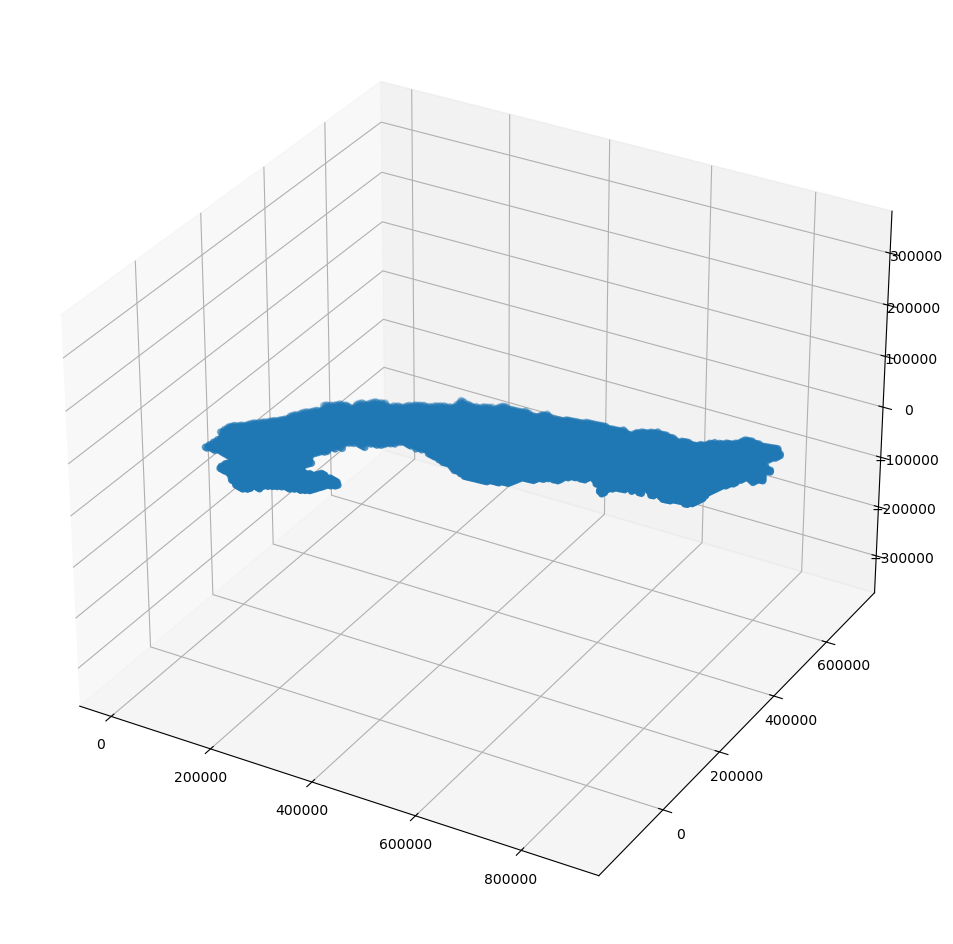

In [36]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(df_alps_pointcloud["x"].values,df_alps_pointcloud["y"].values,df_alps_pointcloud["z"].values)
plt.axis("equal")

In [37]:
xyz_csv_filename = "../data/alps_xyz.csv"

df_alps_pointcloud.to_csv(xyz_csv_filename)